In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import numpy as np

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [2]:
X=np.load('X_val.npy')
y=np.load('y_val.npy')

In [3]:
from keras import layers, models
from keras.models import load_model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def model_load(model):
    model = load_model(model,compile=False)
    model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4), 
            metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])
    
    return model

Using TensorFlow backend.


In [4]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [5]:
#ensemble할 model load

model1=model_load('./G_팔로미_models/VGG16_fine_tuning_3(706).hdf5')
model2=model_load('./G_팔로미_models/Inception v3_fine tuning_2(613).hdf5')
model3=model_load('./G_팔로미_models/ResNet_average_pooling_2(519).hdf5')

members = [model1, model2, model3]

In [6]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, X):
    # make predictions
    yhats = [model.predict(X) for model in members]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    avg=summed/len(members)
    #result = np.argmax(summed, axis=1)
    return avg

# evaluate ensemble model
def evaluate_members(members, X, y):
    # make prediction
    yhat = ensemble_predictions(members, X)
    # calculate accuracy
    return yhat

In [7]:
yhat = ensemble_predictions(members, X)

In [8]:
y_label=np.argmax(y,axis=1)
predict=np.argmax(yhat,axis=1)

In [9]:
#AUC 출력하기
from sklearn.metrics import roc_curve, roc_auc_score, auc

roc_auc_score(y, yhat)

0.9040567135208293

In [10]:
#accuryca 출력하기
from sklearn.metrics import accuracy_score

accuracy_score(y_label,predict)

0.6742556917688266

In [11]:
from sklearn.metrics import confusion_matrix

matrix =confusion_matrix(y_label, predict)

matrix

array([[ 92,  29,   7,   7],
       [ 48,  72,   8,   8],
       [  1,   2, 107,  19],
       [  7,   7,  43, 114]], dtype=int64)

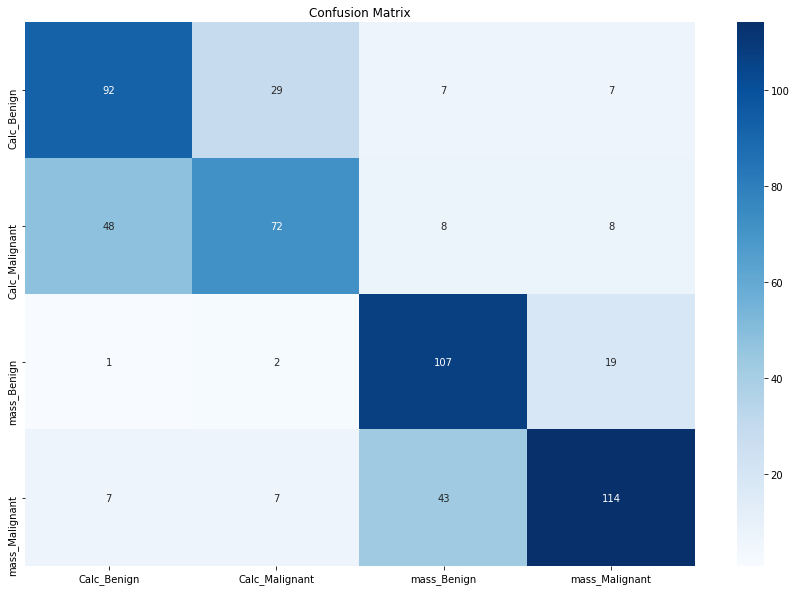

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


index = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
columns = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
cm_df = pd.DataFrame(matrix,columns,index)                      
plt.figure(figsize=(15,10)) 
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')